In [142]:
import pandas as pd
df = pd.read_csv("data/Train.csv", parse_dates=["Date"],date_format="%Y-%m-%d" )
df
df_test = pd.read_csv("data/Test.csv", parse_dates=["Date"],date_format="%Y-%m-%d" )

col_list = set(df.columns.tolist())-set(df_test.columns.tolist())
list(col_list)

['target_min', 'target', 'target_max', 'target_variance', 'target_count']

In [3]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

<Axes: >

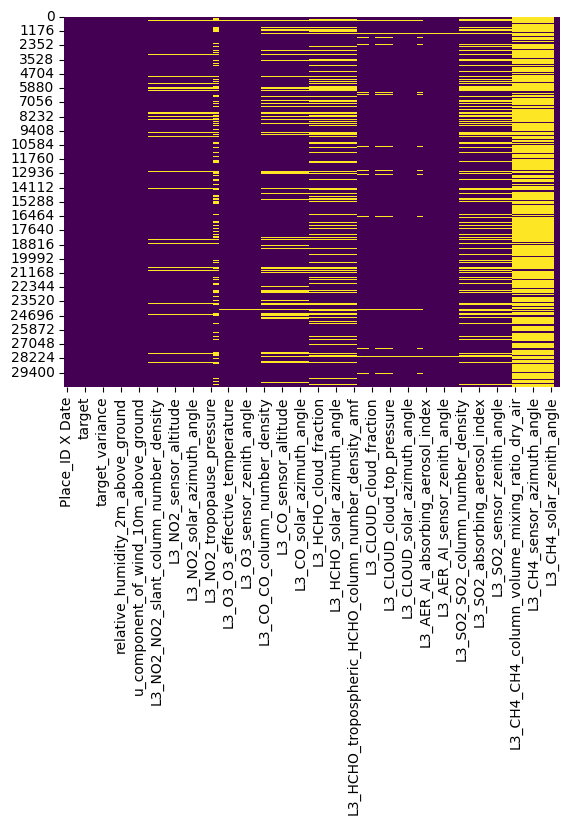

In [133]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [64]:
# Split the data
from sklearn.model_selection import train_test_split
target = "target"
RSEED=42

y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED)

df_train = pd.concat((X_train,y_train), axis=1)

In [139]:
'============= PLOT HISTOGRAMS ============='
def plot_histograms (df, hue_categories=[None],columns = 3):

    """histogram of all numeric columns hue by hue_categories

    Args:
        df (pd.DataFrame): data
        hue_categories (list, optional): hue columns. Defaults to [None].
        columns (int, optional): number of chart columns. Defaults to 3.
    """
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df=df.select_dtypes(include=numerics)
    rows = math.ceil(len(df.columns.to_list())/columns)
    
    for category in hue_categories:
        fig,ax = plt.subplots(rows,columns,figsize=(16,rows*5))

        for i, item in enumerate(df.columns):
            sns.histplot(x=item, data=df, element="step", hue=category, common_norm=False, stat="percent",kde=True, ax=ax[int(i/3)][i%3]).set(title=item, xlabel='')
        ax.flat[-1].set_visible(False)
        fig.tight_layout(pad=columns)


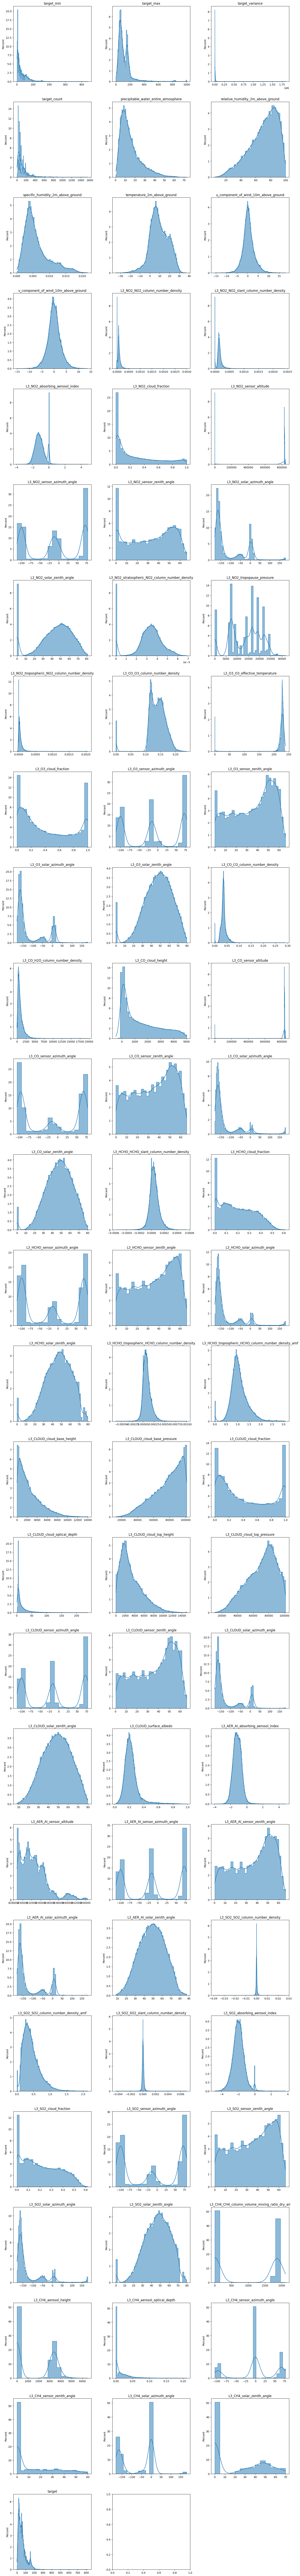

In [140]:
import math
import matplotlib.pyplot as plt

plot_histograms(df_train)

In [18]:
numeric_df = df_train.select_dtypes(include='number')
corr = numeric_df.corr()
target_corr = corr['target'].sort_values(ascending=False)
print(target_corr.head(23))
print(target_corr.tail(20))

target                                             1.000000
target_min                                         0.819327
target_max                                         0.633796
L3_CO_CO_column_number_density                     0.378532
L3_HCHO_tropospheric_HCHO_column_number_density    0.348518
L3_HCHO_HCHO_slant_column_number_density           0.324616
L3_NO2_NO2_slant_column_number_density             0.316730
L3_NO2_NO2_column_number_density                   0.305817
L3_NO2_tropospheric_NO2_column_number_density      0.298988
target_variance                                    0.184364
L3_SO2_absorbing_aerosol_index                     0.155643
L3_CLOUD_cloud_top_pressure                        0.127725
L3_CLOUD_cloud_base_pressure                       0.100152
target_count                                       0.093224
L3_CH4_aerosol_optical_depth                       0.092478
L3_CH4_aerosol_height                              0.079262
L3_CH4_CH4_column_volume_mixing_ratio_dr

In [85]:
def identify_outliers_sigma(df, column, n_sigma=3):
    """
    Identify outliers using n-sigma rule
    Values beyond mean ± n*std are considered outliers
    """
    mean = df[column].mean()
    std = df[column].std()
    
    lower_bound = mean - (n_sigma * std)
    upper_bound = mean + (n_sigma * std)
    
    # Create boolean mask for outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    return lower_bound, upper_bound

print(f"3 sigma boundaries: {identify_outliers_sigma(df_train, 'target', 3)}")

q1 = df[target].quantile(0.25)
q3 = df[target].quantile(0.75)
iqr = q3-q1
target_min = q1 - 1.5*iqr
target_max = q3 + 1.5*iqr

print(f"iqr boundaries{target_min, target_max}")

target_min,target_max=identify_outliers_sigma(df_train, 'target', 3)


3 sigma boundaries: (-79.83130796954407, 202.31554238067991)
iqr boundaries(-57.5, 162.5)


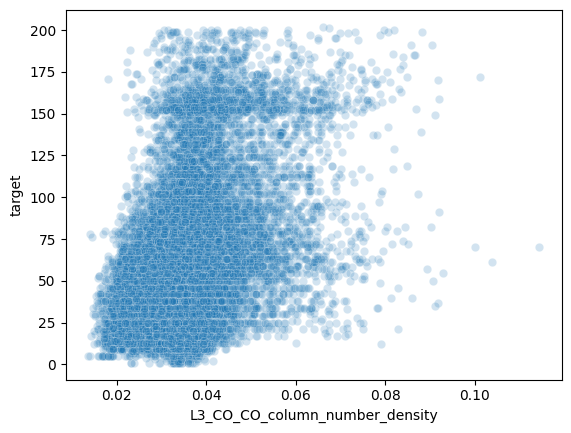

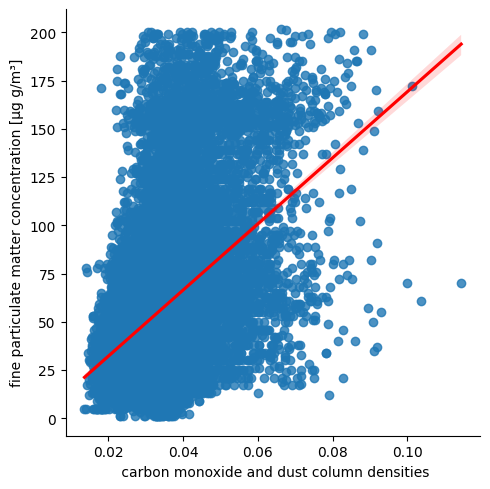

In [95]:
"""
L3_CO_CO_column_number_density has highest correlation with target
we use this therefore for a simple base model
"""
# filtered for non-0 values and excluding some outliers
import seaborn as sns

sns.scatterplot(data=df_train[(df_train["L3_CO_CO_column_number_density"]>0) & (df_train["target"]<target_max)], y="target", x="L3_CO_CO_column_number_density", alpha=0.2)

g=sns.lmplot(line_kws={"color": "red"}, y="target", x="L3_CO_CO_column_number_density", data=df_train[(df_train["L3_CO_CO_column_number_density"]>0) & (df_train["target"]<target_max)])
g.set_axis_labels(' carbon monoxide and dust column densities', 'fine particulate matter concentration [µg g/m³]')
g.savefig("charts/basemodel.png", transparent=True)

(-79.83130796954407, 202.31554238067991)

In [6]:
feature = "L3_CO_CO_column_number_density"
target = "target"
simple_data = df_train[[feature, target]]

print(simple_data.describe())
print("-"*50)
print(f'{int(round((1-simple_data[feature].count()/simple_data[target].count())*100,0))}% of {feature} is null')
print(f'{int(round(simple_data[feature][simple_data[feature]==0].count()/simple_data[target].count()*100,0))}% of {feature} is 0')

       L3_CO_CO_column_number_density        target
count                    18861.000000  22917.000000
mean                         0.036256     61.242117
std                          0.010936     47.024475
min                          0.000000      1.000000
25%                          0.031173     25.000000
50%                          0.035582     50.000000
75%                          0.039846     80.000000
max                          0.291536    815.000000
--------------------------------------------------
18% of L3_CO_CO_column_number_density is null
1% of L3_CO_CO_column_number_density is 0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

X = simple_data[[feature]]
y = simple_data[target]

scale_impute = Pipeline([
    ("imputer_null",KNNImputer(n_neighbors=10, weights="distance")), # deals with null
    ("imputer_0",KNNImputer(n_neighbors=10, weights="distance", missing_values=0)), # deals with 0
    ('scaler', PowerTransformer(method='box-cox', standardize=False))]) # box-cox brings log-normal distributed data to normal distribution

preprocess = ColumnTransformer([
    ("scale_impute", scale_impute, [feature])])

regression = Pipeline([
    ('preprocess', preprocess),
    ('model', LinearRegression())])

regression.fit(X, y)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale_impute', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
from sklearn.metrics import r2_score, root_mean_squared_error

pred = regression.predict(X_test) # df_test[["L3_CO_CO_column_number_density"]])
print(r2_score(y_test, pred))
print(root_mean_squared_error(y_test, pred))

# slope and intercept would have a meaning on unscaled data only...

# intercept = round(regression.named_steps['model'].intercept_,1)
# slope = round(regression.named_steps['model'].coef_[0],1)
# print(f"intercept {intercept} slope {slope}")


0.11695905566556153
43.57147789449833


In [27]:
data=df
#df_chart[""]
#df_train.groupby("Place_ID")["target"].mean().sort_values(ascending=False).head()
#df.groupby("Place_ID")["Place_ID"].count()

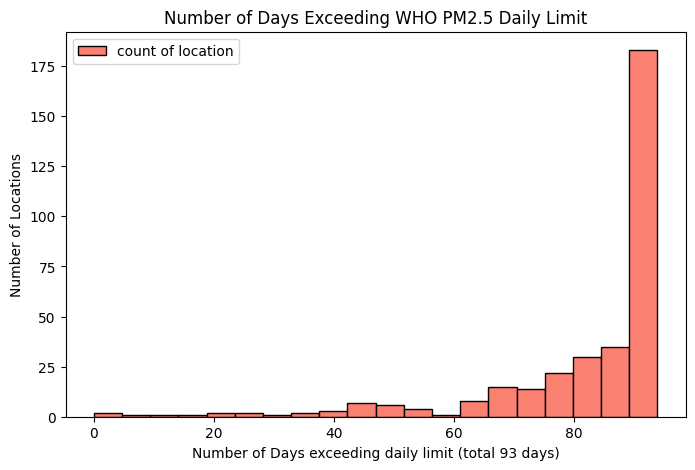

In [54]:
WHO_daily_threshold =15
exceedance_table = (
    data.groupby('Place_ID')['target']
        .agg(
            total_days='count',
            days_above_15=lambda x: (x > WHO_daily_threshold).sum()
        )
        .reset_index()
)

exceedance_table['percent_above_15'] = (
    exceedance_table['days_above_15'] / exceedance_table['total_days'] * 100
).round(2)

exceedance_table = exceedance_table.sort_values('percent_above_15', ascending=False)

from datetime import datetime

#df.Date.max()-df.Date.min()
d1 = datetime.strptime(df.Date.min(), "%Y-%m-%d")
d2 = datetime.strptime(df.Date.max(), "%Y-%m-%d")

plt.figure(figsize=(8,5))
plt.hist(exceedance_table['days_above_15'], bins=20, color='salmon', edgecolor='black', label="count of location")
#plt.axvline(50, color='blue', linestyle='--', label='50 Days threshold')  # optional
plt.title('Number of Days Exceeding WHO PM2.5 Daily Limit')
plt.xlabel(f'Number of Days exceeding daily limit (total {abs((d2 - d1).days)} days)')
plt.ylabel('Number of Locations')
plt.legend()
plt.savefig("charts/location_daily_limit.png", transparent=True)
plt.show()

In [119]:
df_cal = df
df_cal["gt15"]=df_cal["target"]>=15
df_cal = df_cal.groupby("Date")["gt15"].sum()
df_cal = pd.DataFrame(df_cal.reset_index())
df_cal["Date"]=pd.to_datetime(df['Date'])

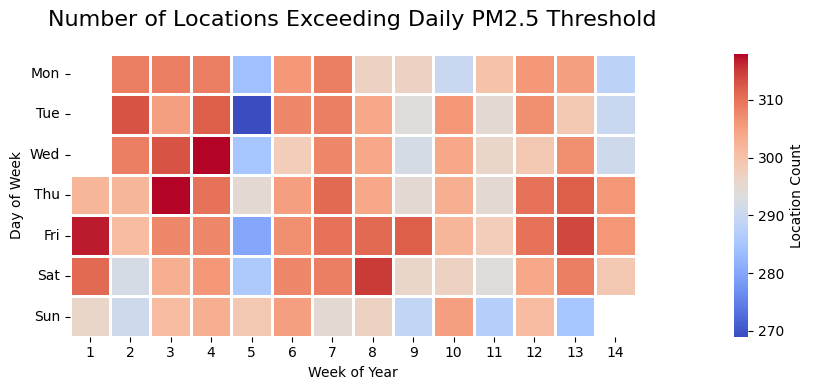

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# INPUT VARIABLES - Set your date range here
min_date = df_cal.Date.min()
max_date = df_cal.Date.max()



# Generate sample data for the date range
num_days = (max_date - min_date).days + 1
dates = [min_date + timedelta(days=i) for i in range(num_days)]
values = np.random.randint(0, 100, size=num_days)  # Random activity values


# Extract calendar components
df_cal['year'] = df_cal['Date'].dt.year
df_cal['month'] = df_cal['Date'].dt.month
df_cal['week'] = df_cal['Date'].dt.isocalendar().week
df_cal['day_of_week'] = df_cal['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Create pivot table for heatmap
# Group by week and day of week
pivot = df_cal.pivot_table(
    values='gt15',
    index='day_of_week',
    columns='week',
    aggfunc='mean'
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(
    pivot,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'label': 'Location Count'},
    ax=ax
)

# Customize labels
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_yticklabels(day_labels, rotation=0)
ax.set_xlabel('Week of Year')
ax.set_ylabel('Day of Week')
ax.set_title('Number of Locations Exceeding Daily PM2.5 Threshold', fontsize=16, pad=20)

plt.tight_layout()
plt.savefig("charts/location_daily_limit_calendar.png", transparent=True)
plt.show()